<a href="https://colab.research.google.com/github/Dollyp1205/Marketing-Research-Methods---Dolly-Poddar--Jio-Institute/blob/In-Class-Assignment/Amazon_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install necessary libraries (silent installation to avoid unnecessary output)
!pip install pandas matplotlib seaborn nltk textblob --quiet

# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

# Download NLTK resources
nltk.download('vader_lexicon')

# Load dataset
file_path = "/content/amazon_review.csv"  # Update if needed
try:
    df = pd.read_csv(file_path)
    print("✅ Dataset successfully loaded!")
except Exception as e:
    print("❌ Error loading dataset:", e)
    exit()

# Display dataset info
print("\n🔹 Dataset Info:")
print(df.info())

# Display first few rows
print("\n🔹 Sample Data:")
print(df.head())

# Identify the review column (update if needed)
review_column = "review_text"  # Change this if column name differs

# Check if the column exists
if review_column not in df.columns:
    print(f"❌ Column '{review_column}' not found! Please check dataset columns:", df.columns)
    exit()

# Drop missing reviews
df = df.dropna(subset=[review_column])
df = df.reset_index(drop=True)

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to compute sentiment scores
def get_sentiment_scores(text):
    if isinstance(text, str):
        vader_score = sia.polarity_scores(text)['compound']  # VADER sentiment score
        textblob_polarity = TextBlob(text).sentiment.polarity  # TextBlob polarity score
        return pd.Series([vader_score, textblob_polarity])
    else:
        return pd.Series([None, None])

# Apply sentiment analysis
df[['vader_score', 'textblob_polarity']] = df[review_column].apply(get_sentiment_scores)

# Categorize sentiment
def categorize_sentiment(score):
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df['Sentiment'] = df['vader_score'].apply(categorize_sentiment)

# Summary Statistics
print("\n🔹 Sentiment Analysis Summary:")
print(df['Sentiment'].value_counts())

# Visualization - Sentiment Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Sentiment'], palette=['red', 'gray', 'green'])
plt.title("Sentiment Distribution of Reviews")
plt.xlabel("Sentiment Category")
plt.ylabel("Review Count")
plt.show()

# Save processed data
output_path = "/mnt/data/sentiment_analysis_results.csv"
df.to_csv(output_path, index=False)
print(f"\n✅ Sentiment Analysis Completed. Results saved at: {output_path}")

# Managerial Insights
print("\n### 📊 Managerial Insights ###")
print(f"🔹 Total Reviews Analyzed: {len(df)}")
print(f"🔹 Positive Reviews: {len(df[df['Sentiment'] == 'Positive'])} ({(len(df[df['Sentiment'] == 'Positive'])/len(df)*100):.2f}%)")
print(f"🔹 Negative Reviews: {len(df[df['Sentiment'] == 'Negative'])} ({(len(df[df['Sentiment'] == 'Negative'])/len(df)*100):.2f}%)")
print(f"🔹 Neutral Reviews: {len(df[df['Sentiment'] == 'Neutral'])} ({(len(df[df['Sentiment'] == 'Neutral'])/len(df)*100):.2f}%)")
print(f"🔹 Average VADER Score: {df['vader_score'].mean():.4f}")

✅ Dataset successfully loaded!

🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviewerID      4915 non-null   object
 1   asin            4915 non-null   object
 2   reviewerName    4914 non-null   object
 3   helpful         4915 non-null   object
 4   reviewText      4914 non-null   object
 5   overall         4915 non-null   int64 
 6   summary         4915 non-null   object
 7   unixReviewTime  4915 non-null   int64 
 8   reviewTime      4915 non-null   object
 9   day_diff        4915 non-null   int64 
 10  helpful_yes     4915 non-null   int64 
 11  total_vote      4915 non-null   int64 
dtypes: int64(5), object(7)
memory usage: 460.9+ KB
None

🔹 Sample Data:
       reviewerID        asin  reviewerName helpful  \
0  A3SBTW3WS4IQSN  B007WTAJTO           NaN  [0, 0]   
1  A18K1ODH1I2MVB  B007WTAJTO          0mie  [

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


KeyError: ['review_text']

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
<ipython-input-1-540407af9c99>:37: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[date_column] = pd.to_datetime(df[date_column], errors='coerce')



✅ Dataset Columns: Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime', 'day_diff',
       'helpful_yes', 'total_vote'],
      dtype='object')

🔹 Logistic Regression Model Accuracy: 0.8736263736263736

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.31      0.44       147
           1       0.88      0.98      0.93       763

    accuracy                           0.87       910
   macro avg       0.83      0.64      0.68       910
weighted avg       0.86      0.87      0.85       910



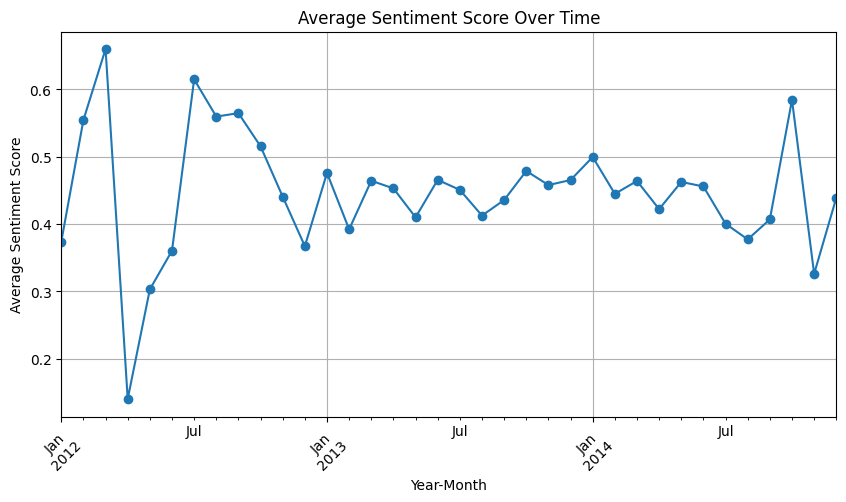

<ipython-input-1-540407af9c99>:105: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Sentiment'].replace({0: "Negative", 1: "Positive"}), palette=['red', 'green'])


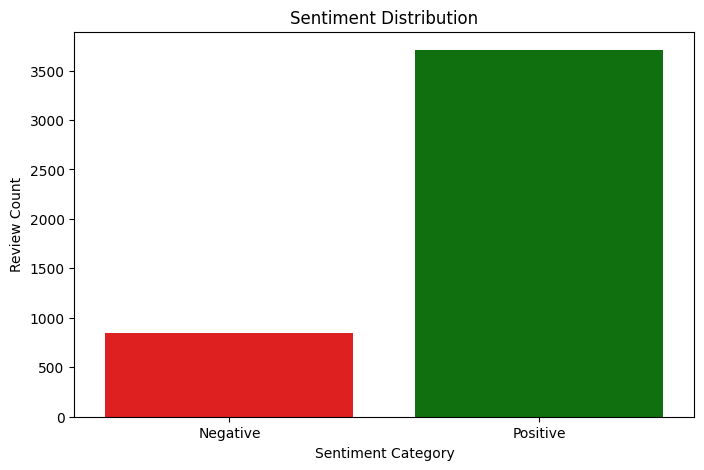

OSError: Cannot save file into a non-existent directory: '/mnt/data'

In [ ]:
# Install necessary libraries
!pip install pandas matplotlib seaborn nltk textblob scikit-learn --quiet

# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Download NLTK resources
nltk.download('vader_lexicon')

# Load dataset
file_path = "/content/amazon_review.csv"  # Change if needed
df = pd.read_csv(file_path)

# Check dataset columns
print("\n✅ Dataset Columns:", df.columns)

# Identify the correct review column
review_column = "reviewText"  # Ensure correct column name
date_column = "reviewTime"  # If available, else ignore time series part

# Drop missing reviews
df = df.dropna(subset=[review_column])
df = df.reset_index(drop=True)

# Convert date column to datetime (if present)
if date_column in df.columns:
    df[date_column] = pd.to_datetime(df[date_column], errors='coerce')

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to compute sentiment scores
def get_sentiment_scores(text):
    if isinstance(text, str):
        vader_score = sia.polarity_scores(text)['compound']  # VADER sentiment score
        textblob_polarity = TextBlob(text).sentiment.polarity  # TextBlob polarity score
        return pd.Series([vader_score, textblob_polarity])
    else:
        return pd.Series([None, None])

# Apply sentiment analysis
df[['vader_score', 'textblob_polarity']] = df[review_column].apply(get_sentiment_scores)

# Categorize sentiment for logistic regression
def categorize_sentiment(score):
    if score >= 0.05:
        return 1  # Positive
    elif score <= -0.05:
        return 0  # Negative
    else:
        return 2  # Neutral

df['Sentiment'] = df['vader_score'].apply(categorize_sentiment)

# Prepare data for logistic regression
df = df[df['Sentiment'] != 2]  # Remove neutral reviews
X = df[review_column]  # Feature: Review text
y = df['Sentiment']  # Target: Sentiment (0=Negative, 1=Positive)

# Convert text data into TF-IDF vectors
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Train Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict on test set
y_pred = log_reg.predict(X_test)

# Evaluate model performance
print("\n🔹 Logistic Regression Model Accuracy:", accuracy_score(y_test, y_pred))
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))

# Time Series Analysis (if date column exists)
if date_column in df.columns:
    df['YearMonth'] = df[date_column].dt.to_period('M')
    sentiment_trend = df.groupby('YearMonth')['vader_score'].mean()

    # Plot sentiment over time
    plt.figure(figsize=(10, 5))
    sentiment_trend.plot(marker='o', linestyle='-')
    plt.title("Average Sentiment Score Over Time")
    plt.xlabel("Year-Month")
    plt.ylabel("Average Sentiment Score")
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

# Sentiment Distribution Visualization
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Sentiment'].replace({0: "Negative", 1: "Positive"}), palette=['red', 'green'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment Category")
plt.ylabel("Review Count")
plt.show()

# Save results
output_path = "/mnt/data/sentiment_analysis_results.csv"
df.to_csv(output_path, index=False)
print(f"\n✅ Analysis Completed. Results saved at: {output_path}")

# Managerial Insights
print("\n### 📊 Managerial Insights ###")
print(f"🔹 Total Reviews Analyzed: {len(df)}")
print(f"🔹 Positive Reviews: {len(df[df['Sentiment'] == 1])} ({(len(df[df['Sentiment'] == 1])/len(df)*100):.2f}%)")
print(f"🔹 Negative Reviews: {len(df[df['Sentiment'] == 0])} ({(len(df[df['Sentiment'] == 0])/len(df)*100):.2f}%)")
print(f"🔹 Average VADER Score: {df['vader_score'].mean():.4f}")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
<ipython-input-2-61391a30a38e>:32: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[date_column] = pd.to_datetime(df[date_column], errors='coerce')



✅ Dataset Columns: Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime', 'day_diff',
       'helpful_yes', 'total_vote'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


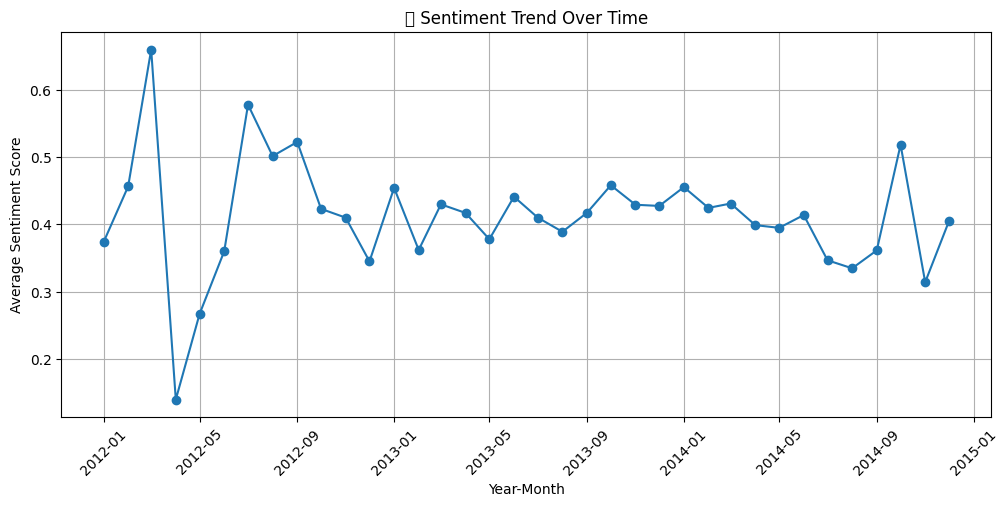

<ipython-input-2-61391a30a38e>:74: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2-61391a30a38e>:74: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2-61391a30a38e>:74: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-pac

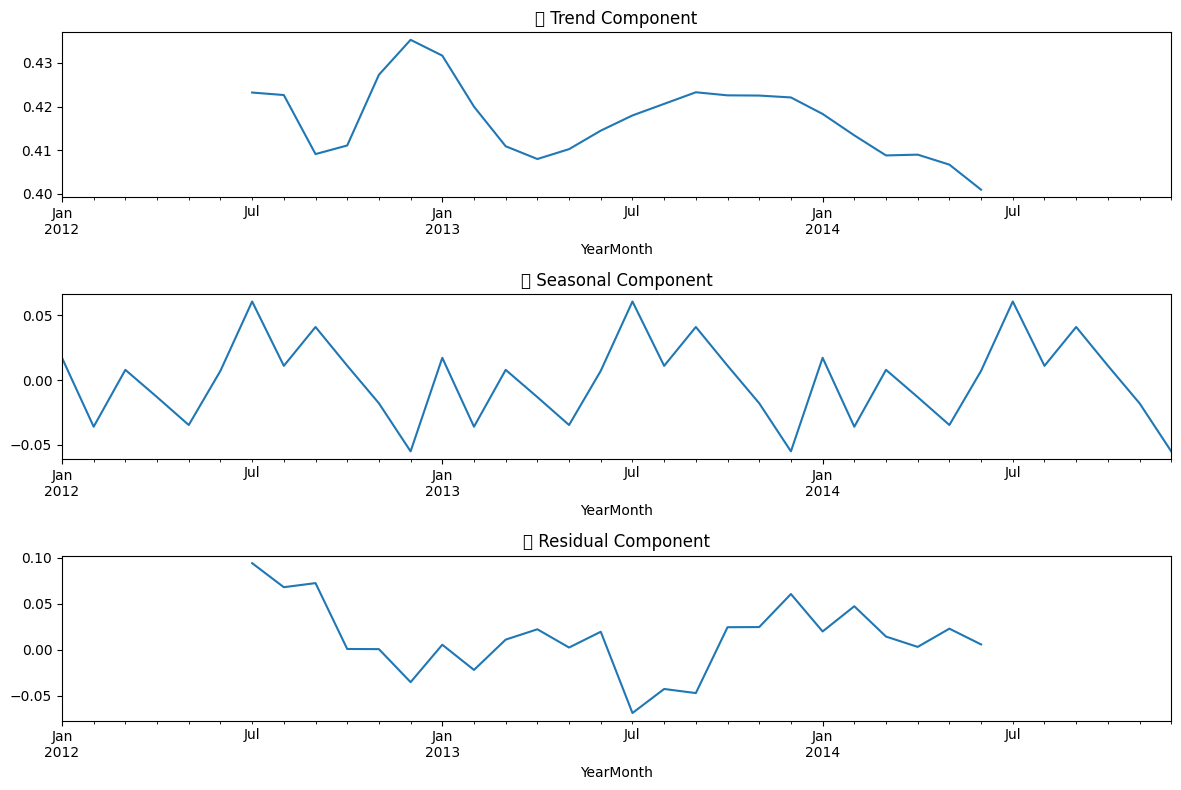

OSError: Cannot save file into a non-existent directory: '/mnt/data'

In [ ]:
# Install necessary libraries
!pip install pandas matplotlib seaborn nltk textblob statsmodels --quiet

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import statsmodels.api as sm

# Download NLTK resources
nltk.download('vader_lexicon')

# Load dataset
file_path = "/content/amazon_review.csv"  # Adjust if needed
df = pd.read_csv(file_path)

# Check dataset columns
print("\n✅ Dataset Columns:", df.columns)

# Identify the correct columns
review_column = "reviewText"  # Ensure correct column name
date_column = "reviewTime"  # Ensure correct column name

# Drop missing reviews
df = df.dropna(subset=[review_column])
df = df.reset_index(drop=True)

# Convert date column to datetime
df[date_column] = pd.to_datetime(df[date_column], errors='coerce')

# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Function to compute sentiment scores
def get_sentiment(text):
    if isinstance(text, str):
        return sia.polarity_scores(text)['compound']
    else:
        return None

# Apply sentiment analysis
df['sentiment_score'] = df[review_column].apply(get_sentiment)

# Convert dates to Year-Month format for trend analysis
df['YearMonth'] = df[date_column].dt.to_period('M')

# Aggregate sentiment scores monthly
sentiment_trend = df.groupby('YearMonth')['sentiment_score'].mean()

# Convert PeriodIndex to DatetimeIndex
sentiment_trend.index = sentiment_trend.index.to_timestamp()

# Plot sentiment trend over time
plt.figure(figsize=(12, 5))
plt.plot(sentiment_trend, marker='o', linestyle='-')
plt.title("📈 Sentiment Trend Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Average Sentiment Score")
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Perform Decomposition (Trend, Seasonality, Residuals)
decomposition = sm.tsa.seasonal_decompose(sentiment_trend, model='additive')

# Plot Decomposition
fig, axes = plt.subplots(3, 1, figsize=(12, 8))
decomposition.trend.plot(ax=axes[0], title="📊 Trend Component")
decomposition.seasonal.plot(ax=axes[1], title="📊 Seasonal Component")
decomposition.resid.plot(ax=axes[2], title="📊 Residual Component")
plt.tight_layout()
plt.show()

# Save the results
output_path = "/mnt/data/sentiment_time_series.csv"
sentiment_trend.to_csv(output_path)
print(f"\n✅ Time Series Analysis Completed. Results saved at: {output_path}")

# Managerial Insights
print("\n### 📊 Managerial Insights ###")
print(f"🔹 Total Reviews Analyzed: {len(df)}")
print(f"🔹 Sentiment Trend from {sentiment_trend.index.min().strftime('%Y-%m')} to {sentiment_trend.index.max().strftime('%Y-%m')}")
print(f"🔹 Average Monthly Sentiment Score: {sentiment_trend.mean():.4f}")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!



✅ Dataset Columns: Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime', 'day_diff',
       'helpful_yes', 'total_vote'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


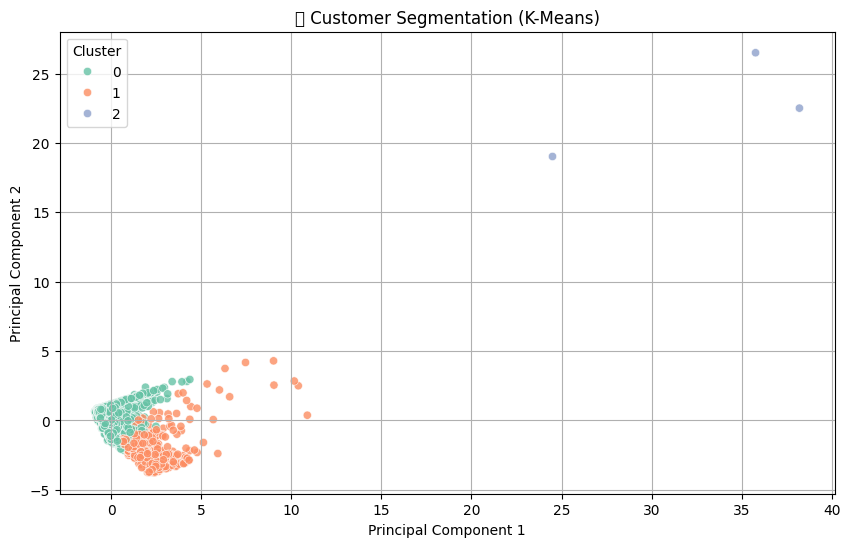

<ipython-input-4-d5ec0e89f32b>:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['cluster'], y=df['sentiment_score'], palette='Set1')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


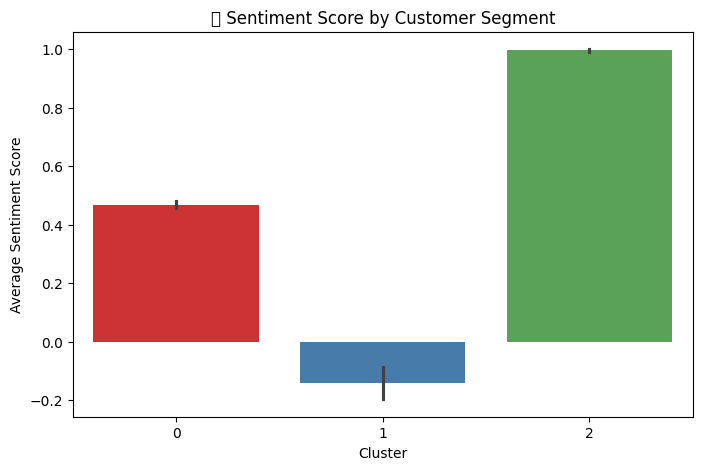

OSError: Cannot save file into a non-existent directory: '/mnt/data'

In [ ]:
# Install necessary libraries
!pip install pandas matplotlib seaborn nltk textblob scikit-learn --quiet

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Download NLTK resources
nltk.download('vader_lexicon')

# Load dataset
file_path = "/content/amazon_review.csv"  # Adjust if needed
df = pd.read_csv(file_path)

# Check dataset columns
print("\n✅ Dataset Columns:", df.columns)

# Identify the correct columns
review_column = "reviewText"  # Ensure correct column name
helpful_column = "helpful"  # Adjust if needed
rating_column = "overall"  # Assuming ratings are in 'overall' column

# Drop missing values
df = df.dropna(subset=[review_column, rating_column])
df = df.reset_index(drop=True)

# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Function to compute sentiment scores
def get_sentiment(text):
    if isinstance(text, str):
        return sia.polarity_scores(text)['compound']
    else:
        return None

# Apply sentiment analysis
df['sentiment_score'] = df[review_column].apply(get_sentiment)

# Extract additional features
df['review_length'] = df[review_column].apply(lambda x: len(str(x)))
df['helpful_votes'] = df[helpful_column].apply(lambda x: eval(str(x))[0] if isinstance(x, str) and x.startswith('[') else 0)  # Extract number of helpful votes

# Select features for clustering
features = df[[rating_column, 'sentiment_score', 'review_length', 'helpful_votes']] # Use rating_column variable here

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(features_scaled)

# Apply PCA for visualization
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)
df['pca_1'] = features_pca[:, 0]
df['pca_2'] = features_pca[:, 1]

# Scatter plot of customer segments
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['pca_1'], y=df['pca_2'], hue=df['cluster'], palette='Set2', alpha=0.8)
plt.title("📊 Customer Segmentation (K-Means)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.grid()
plt.show()

# Bar plot of average sentiment score per cluster
plt.figure(figsize=(8, 5))
sns.barplot(x=df['cluster'], y=df['sentiment_score'], palette='Set1')
plt.title("📈 Sentiment Score by Customer Segment")
plt.xlabel("Cluster")
plt.ylabel("Average Sentiment Score")
plt.show()

# Save the results
output_path = "/mnt/data/customer_segmentation.csv"
df.to_csv(output_path, index=False)
print(f"\n✅ Customer Segmentation Completed. Results saved at: {output_path}")

# Managerial Insights
print("\n### 📊 Managerial Insights ###")
print(f"🔹 Total Customers Segmented: {len(df)}")
print(f"🔹 Number of Segments: 3")
print(df.groupby('cluster').agg({'rating_column': 'mean', 'sentiment_score': 'mean', 'review_length': 'mean', 'helpful_votes': 'mean'}))